# Analysis - 3

# Seasonal Pattern of Prices

In [1]:
#Cleaning the data

import pandas as pd
import numpy as np
import re

calendarDF=pd.read_csv("calendar.csv")

#replacing NaN values with 0
calendarDF.fillna(0, inplace=True)
calendarDF = calendarDF[calendarDF.price != 0]

#Extracting prices from the table
price = calendarDF['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
#replace the price column with the new column
calendarDF['price']=prices

calendarDF = calendarDF[calendarDF.price >= 0]

#separating date column into day month and year
calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str
calendarDF.head()


,listing_id,date,available,price,Year,Month,Day
365,3075044,2017-08-22,t,65.0,2017,08,22
366,3075044,2017-08-21,t,65.0,2017,08,21
367,3075044,2017-08-20,t,65.0,2017,08,20
368,3075044,2017-08-19,t,75.0,2017,08,19
369,3075044,2017-08-18,t,75.0,2017,08,18


#基于年份和月份对价格的趋势进行分析

In [2]:
yearDF=calendarDF.groupby(['Year','Month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'average_Price'})
yearDF['year-Month']=yearDF['Year'].map(str) + "-" + yearDF['Month'].map(str)
yearDF.to_csv('year_month_data.csv')
yearDF.head()

,Year,Month,average_Price,year-Month
0,2016,09,252.677308,2016-09
1,2016,10,233.416248,2016-10
2,2016,11,202.924416,2016-11
3,2016,12,192.601915,2016-12
4,2017,01,182.799671,2017-01


#使用图表对结果进行可视化

Text(0, 0.5, 'Average Price')

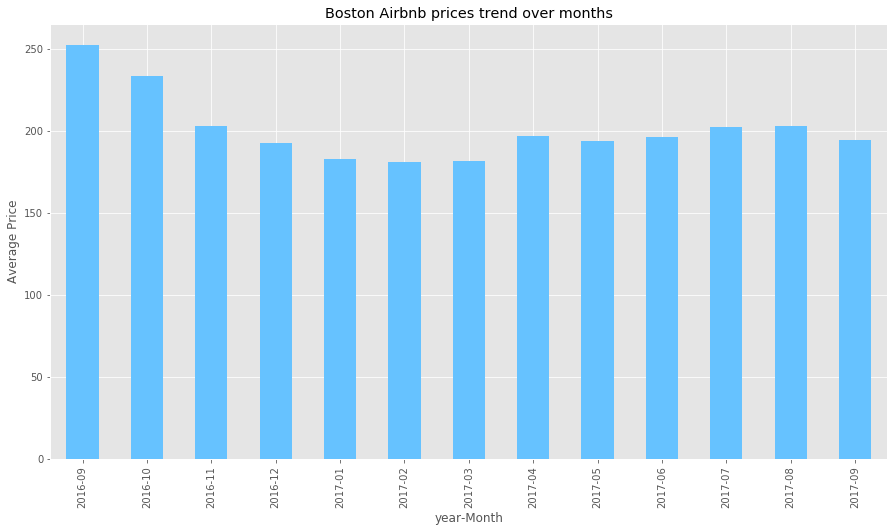

In [3]:
# visualizing the trend of year/Month and average prices of the listing

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = yearDF['year-Month']
y_pos = yearDF['average_Price']

yearDF.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Boston Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')


#得出结论：2016年的9月和10月，民宿的平均价格最高。为了进一步分析价格的季节性变动特点，将节假日因素考虑在其中。

In [10]:
#getting day name from date data and holidays

from datetime import date
import datetime
import calendar
import holidays

calendarDF.fillna(0, inplace=True)
us_holidays = holidays.US()

calendarDF['day_Name']='default'
calendarDF['holiday']='False'
calendarDF['us_holidays_name']='working'
for index,row in calendarDF.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
    calendarDF.set_value(index,'day_Name',calendar.day_name[sdate.weekday()])
    calendarDF.set_value(index,'holiday',vall)
    calendarDF.set_value(index,'us_holidays_name',us_holidays.get(sdate))
#calendarDF.to_csv('holidays_data.csv')
calendarDF.head()


d:\python\python install\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\python\python install\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\python\python install\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,listing_id,date,available,price,Year,Month,Day,day_Name,holiday,us_holidays_name
365,3075044,2017-08-22,t,65.0,2017,08,22,Tuesday,False,None
366,3075044,2017-08-21,t,65.0,2017,08,21,Monday,False,None
367,3075044,2017-08-20,t,65.0,2017,08,20,Sunday,False,None
368,3075044,2017-08-19,t,75.0,2017,08,19,Saturday,False,None
369,3075044,2017-08-18,t,75.0,2017,08,18,Friday,False,None


#新增了三个列：Day_Name, Holiday和us_holiday_name 

In [11]:
#calculating Average price for each day

dayDF=calendarDF.groupby('day_Name').price.mean()
dayDF=dayDF.reset_index()
dayDF['day_num']=0

for index,row in dayDF.iterrows():
    if row['day_Name']=='Monday':
        dayDF.set_value(index,'day_num',1)
    if row['day_Name']=='Tuesday':
        dayDF.set_value(index,'day_num',2)
    if row['day_Name']=='Wednesday':
        dayDF.set_value(index,'day_num',3)
    if row['day_Name']=='Thursday':
        dayDF.set_value(index,'day_num',4)
    if row['day_Name']=='Friday':
        dayDF.set_value(index,'day_num',5)
    if row['day_Name']=='Saturday':
        dayDF.set_value(index,'day_num',6)
    if row['day_Name']=='Sunday':
        dayDF.set_value(index,'day_num',7)
dayDF=dayDF.sort_values('day_num',ascending=[1])
dayDF=dayDF.rename(columns={'price':'Average_Price'})
dayDF

d:\python\python install\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\python\python install\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
d:\python\python install\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\python\python install\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\python\python install\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  

,day_Name,Average_Price,day_num
1,Monday,195.809561,1
5,Tuesday,195.173842,2
6,Wednesday,195.418228,3
4,Thursday,198.073112,4
0,Friday,203.121167,5
2,Saturday,203.408387,6
3,Sunday,198.219764,7


In [12]:
#checking which holiday has maximum listings

holidayDF=calendarDF.groupby('us_holidays_name').listing_id.count()
holidayDF=holidayDF.reset_index()
holidayDF=holidayDF.sort_values('listing_id',ascending=[0])
holidayDF

,us_holidays_name,listing_id
9,Thanksgiving,2067
5,"Martin Luther King, Jr. Day",2048
11,Washington's Birthday,2036
7,New Year's Day,2027
8,New Year's Day (Observed),2027
0,Christmas Day,1938
1,Christmas Day (Observed),1932
4,Labor Day,1801
10,Veterans Day,1793
3,Independence Day,1763


[Text(0, 0.5, 'Total Number of Listings'), Text(0.5, 0, 'US Holidays Name')]

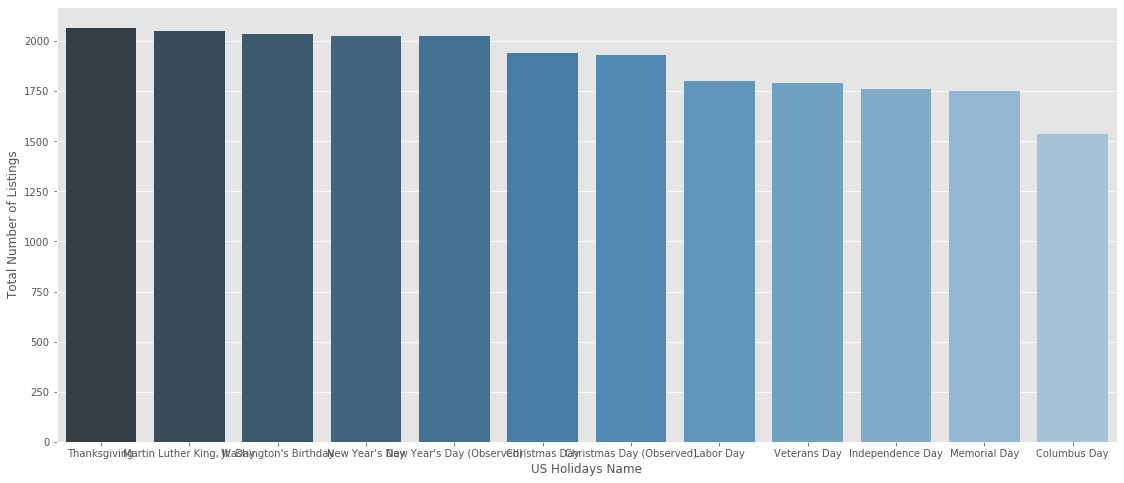

In [13]:
# visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("us_holidays_name", y="listing_id", data=holidayDF,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Total Number of Listings')

#得出结论： thanksgiving day 时民宿数量是最多的，接下来分析此时的民宿价格是否是最高的

In [14]:
holidayPriceDF=calendarDF.groupby('us_holidays_name').price.mean()
holidayPriceDF=holidayPriceDF.reset_index()
holidayPriceDF=holidayPriceDF.sort_values('price',ascending=[0])

holidayPriceDF.head(10)

,us_holidays_name,price
2,Columbus Day,237.838101
10,Veterans Day,205.283324
9,Thanksgiving,200.077407
0,Christmas Day,198.380805
3,Independence Day,197.900737
1,Christmas Day (Observed),196.901139
7,New Year's Day,191.555994
6,Memorial Day,190.034305
4,Labor Day,189.907829
8,New Year's Day (Observed),183.823384


[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'US Holidays Name')]

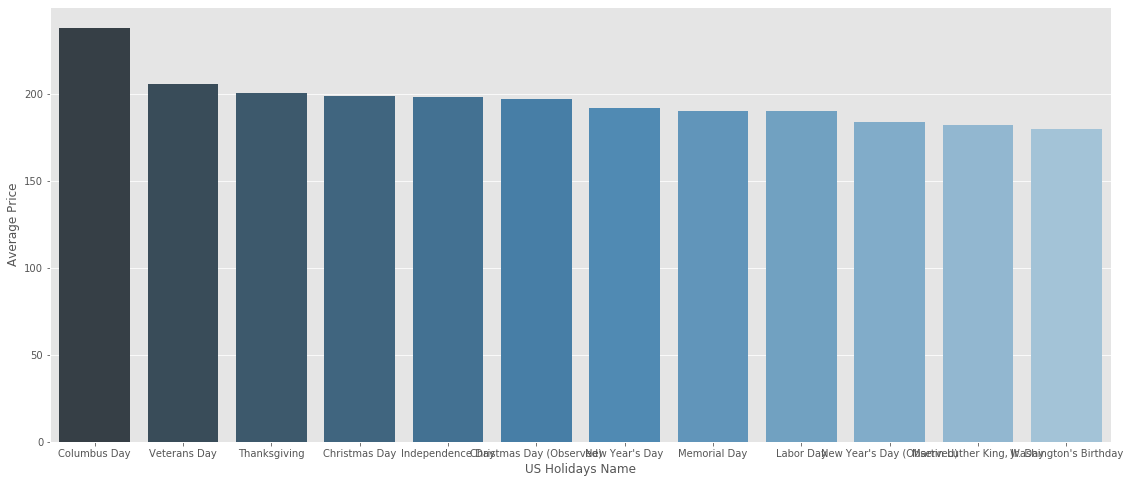

In [15]:
# visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("us_holidays_name", y="price", data=holidayPriceDF,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Average Price')

In [16]:
merger=pd.merge(holidayDF,holidayPriceDF,on='us_holidays_name')
merger=merger.rename(columns={'listing_id':'number_Of_Listings'})
merger=merger.rename(columns={'price':'average_Price'})
merger

,us_holidays_name,number_Of_Listings,average_Price
0,Thanksgiving,2067,200.077407
1,"Martin Luther King, Jr. Day",2048,181.713867
2,Washington's Birthday,2036,179.407662
3,New Year's Day,2027,191.555994
4,New Year's Day (Observed),2027,183.823384
5,Christmas Day,1938,198.380805
6,Christmas Day (Observed),1932,196.901139
7,Labor Day,1801,189.907829
8,Veterans Day,1793,205.283324
9,Independence Day,1763,197.900737


#从2016年9月和10月的数据中观察民宿平均价格的变动

In [17]:
#analyzing data of september and october

checkHolidaysDF=calendarDF[(calendarDF['Year'] == '2016') & ((calendarDF['Month'] == '09') |(calendarDF['Month'] == '10'))]
checkHolidaysDF=checkHolidaysDF.groupby(['Year','Month','holiday']).price.mean()
checkHolidaysDF=checkHolidaysDF.reset_index()
checkHolidaysDF.head()

,Year,Month,holiday,price
0,2016,09,False,252.677308
1,2016,10,False,233.264468
2,2016,10,True,237.838101


#我们可以看到，十月份的周末，民宿的平均价格比平常要高

In [18]:
#analyzing longweekednd holiday days

columbusDF=calendarDF[(calendarDF['Year'] == '2016') & (calendarDF['Month'] == '10' ) & ((calendarDF['Day'] == '08') | (calendarDF['Day'] == '09') | (calendarDF['Day'] == '10'))]
columbusDF.groupby('Month').price.mean()


Month
10    244.633573
Name: price, dtype: float64

In [19]:
#analyzing rest of the days

NocolumbusDF=calendarDF[(calendarDF['Year'] == '2016') & (calendarDF['Month'] == '10' ) & ((calendarDF['Day'] != '08') | (calendarDF['Day'] != '09') | (calendarDF['Day'] != '10'))]
NocolumbusDF.groupby('Month').price.mean()

Month
10    233.416248
Name: price, dtype: float64

#周末的平均价格是244.63，平时的价格是233.42，因此我们可以认为周末的价格比平时工作日高

In [20]:
# analyzing data from date 5th of October to date 13th of October which includes both long weekend and normal workdays

octDF=calendarDF[(calendarDF['Year'] == '2016') & (calendarDF['Month'] == '10' )& ((calendarDF['Day'] == '05' )| (calendarDF['Day'] == '06' )| (calendarDF['Day'] == '07' )| (calendarDF['Day'] == '08' )| (calendarDF['Day'] == '09' )| (calendarDF['Day'] == '10' )| (calendarDF['Day'] == '10' )| (calendarDF['Day'] == '11' )| (calendarDF['Day'] == '12' )| (calendarDF['Day'] == '13' ))]
octDF=octDF.groupby('Day').price.mean()
octDF=octDF.reset_index()
octDF=octDF.sort_values('Day',ascending=[1])
octDF=octDF.rename(columns={'price':'Average_Price'})
octDF.head(10)

,Day,Average_Price
0,05,229.066098
1,06,234.144895
2,07,247.385878
3,08,255.423423
4,09,242.703756
5,10,237.838101
6,11,228.388535
7,12,228.694553
8,13,232.259210


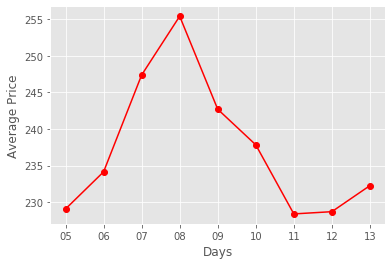

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x=octDF['Day'].tolist()
y=octDF['Average_Price'].tolist()

plt.plot(x,y, 'ro-')
plt.ylabel('Average Price')
plt.xlabel('Days')
plt.show()

#从曲线图中我们更可以得出结论，周末的平均价格是高于工作日的